## Background: 
It is important for credit Card companies to detect fraud cases. In this data set we are given PCA transformed dataset [due to confidentiality requirements] on the basis of which we have to judge if the transaction is legit or a fraudulent one. The dataset is high imablanced as most of the transactions are legit. 

We will do some exploratory data analysis and also try different machine learning models to check which one gives better results on this highly skewed data. 

In [1]:
#making the imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
#reading the csv file provided
data = pd.read_csv('../input/creditcard.csv')

In [3]:
#checking the head
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


As we can see that all columns are named as V... This is a PCA transformed dataset and we don't have any info about the customers or other features of these transactions. 

In [4]:
#having a look at the column data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

As we can see that mostly columns are type 'float'. 

In [5]:
#checking for nulls.

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

So no need for missing values imputation as all columns are null free.

## Exploratory Data Analysis (EDA)
Lets do some data visualization.

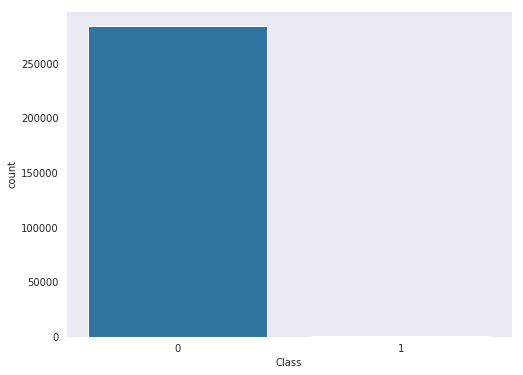

In [6]:
#checking the target variable distribution
plt.figure(figsize = (8,6))
sns.set_style('dark')
sns.countplot(data['Class'])
plt.show()

Highly imbalanced data as fraudluent transactions are very less. Lets try to see it on log scale.

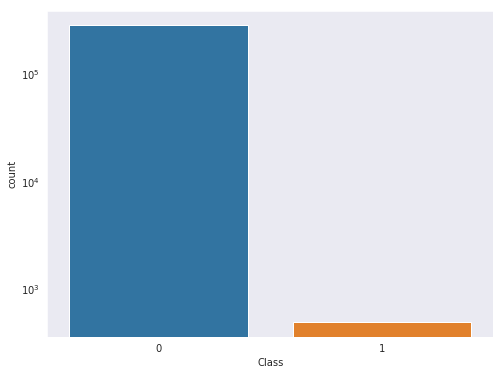

In [7]:
plt.figure(figsize = (8,6))
sns.countplot(data['Class'])
plt.yscale('log')
plt.show()

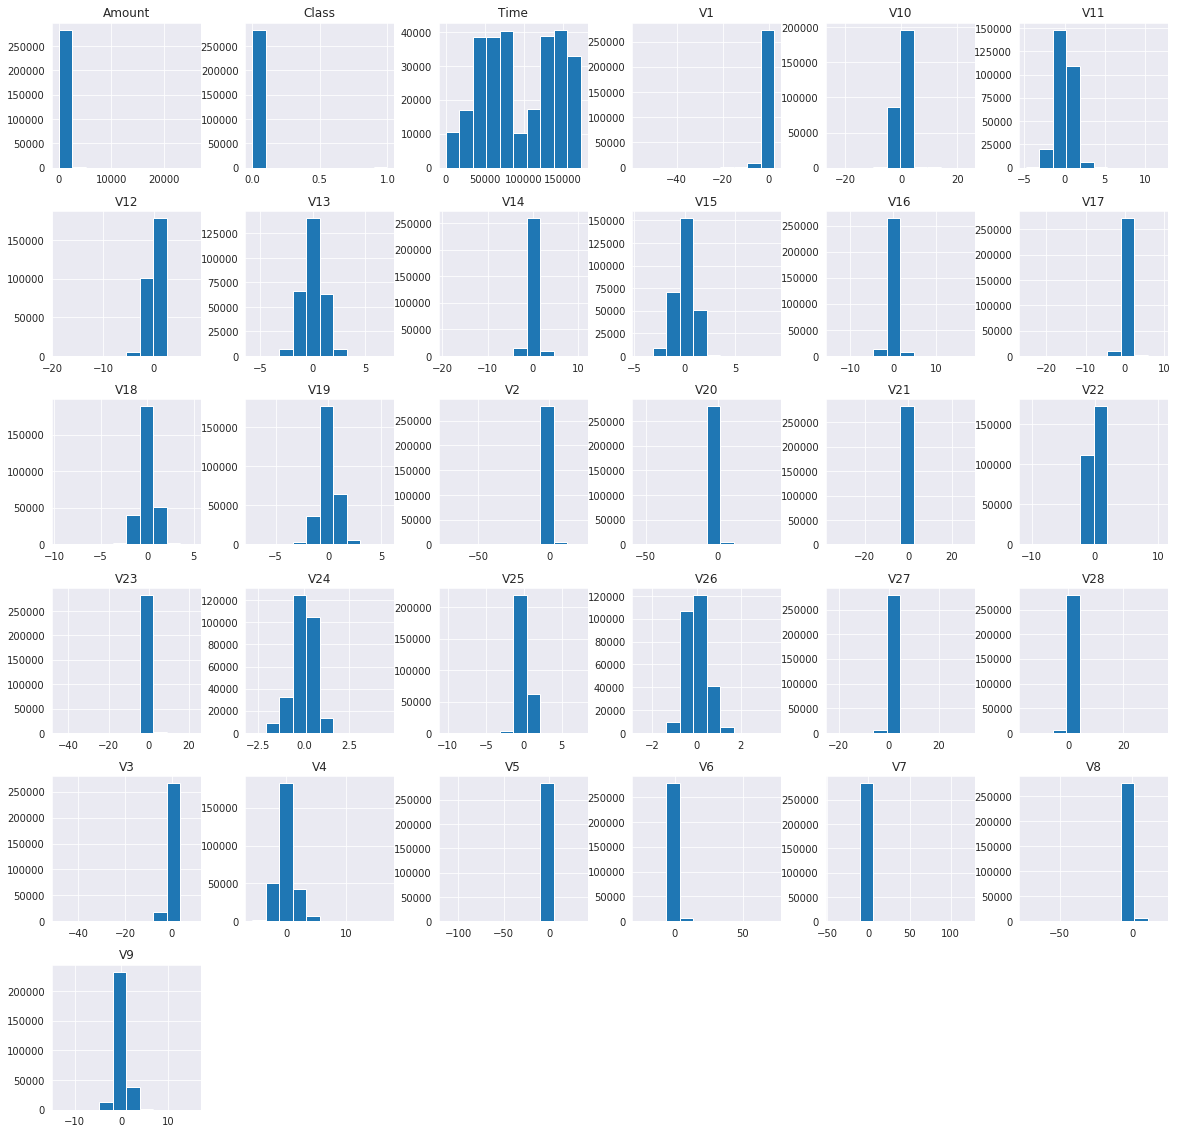

In [8]:
#dataset histogram
data.hist(figsize = (20,20))
plt.show()

We can see that most of the columns are concentrated around zero value.

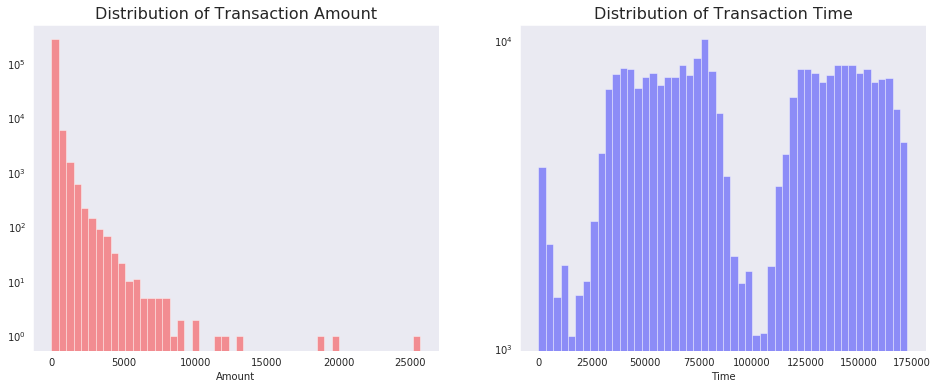

In [9]:
#checking the distribution of transaction amount and time

plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.distplot(data['Amount'], color='r', kde= False)
plt.title('Distribution of Transaction Amount', fontsize=16)
plt.yscale('log')

plt.subplot(1,2,2)
sns.distplot(data['Time'], color='b', kde= False)
plt.title('Distribution of Transaction Time', fontsize=16)
plt.yscale('log')

plt.show()


There are some outliers  in Amount column. 

In [10]:
#checking the percentage of fraud transactions

fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

fraud_ratio = len(fraud)/ float(len(valid) + len(fraud))

print('The number of Fraudulent cases is: {} \n'.format(len(fraud)))
print('The number of valid transactions is: {} \n'.format(len(valid)))
print('The ratio of fraudulent transactions is: {}'.format(fraud_ratio))

The number of Fraudulent cases is: 492 

The number of valid transactions is: 284315 

The ratio of fraudulent transactions is: 0.001727485630620034


So only 0.17% of the total transactions are fraudulent. Highly skewed data set.

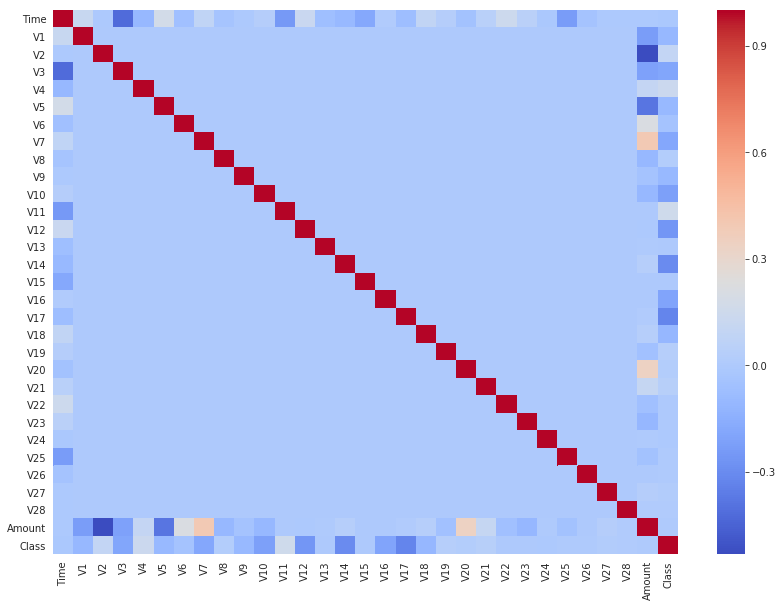

In [11]:
#heat map of data to see correlation

plt.figure(figsize = (14,10))
sns.heatmap(data.corr(), cmap= 'coolwarm')
plt.show()

We can see that there is no strong co-relatin between amount/class or time/class.
Some of the columns before V19 have negative co-relation with the class column.

## Data Pre-Processing

In [12]:
#lets divide the data into X and y

columns = data.columns.tolist()

cols = [c for c in columns if c not in ['Class']]
target = 'Class'

X = data[cols]
y = data[target]

print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


## Scaling/ Normalization

Although other than 'time' and 'amount' columns are already scaled but let's apply the scaling to all to bring them on to a similar range.

In [13]:
#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)

In [14]:
#convert target variable to numpy array
y = y.as_matrix()

In [15]:
#print the shapes of X and y
print(scaled_X.shape)
print('\n')
print(y.shape)

(284807, 30)


(284807,)


## Model building and predictions
## Random Forest

We will try different models. Let's begin with Random Forest.

In [16]:
#make the imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
#doing the train test split (20% test data)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.20, random_state=101)

In [18]:
#fit the data to default Ramdom Forest classifier.
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
#get the predictions
pred_Random_Forest = rfc.predict(X_test)

In [20]:
#function for plotting confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.coolwarm):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')
        #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=25)

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 20)
    plt.xlabel('Predicted label', fontsize = 20)

In [21]:
#confusion matrix
cnf_matrix = confusion_matrix(y_test,pred_Random_Forest)
np.set_printoptions(precision=2)

Precision Score: 0.963855421686747

Recall Score: 0.7766990291262136

Accuracy Score: 0.9995435553526912



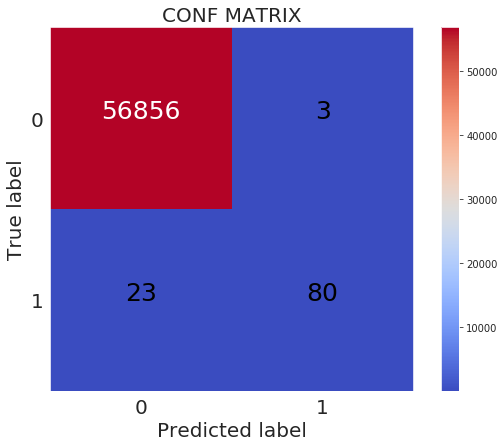

In [22]:
#print the precision, recall , accuracy and confusion matrix

from sklearn.metrics import precision_score, recall_score, accuracy_score

print('Precision Score: {}\n'.format(precision_score(y_test,pred_Random_Forest)))
print('Recall Score: {}\n'.format(recall_score(y_test,pred_Random_Forest)))
print('Accuracy Score: {}\n'.format(accuracy_score(y_test,pred_Random_Forest)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize = (8,6))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='CONF MATRIX')
plt.show()

Precision and accuracy is good but recall needs improvement. 

## Grid Search CV
Lets use grid search to tune the hyper parameters.

In [23]:
# import and instantiate the grid search cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

fold = KFold(n_splits= 3, shuffle= True, random_state= 42)

param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 200, 300),
    'min_samples_split': range(200, 300, 400),
    'n_estimators': [50,100,200]
}
# Create a base model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = fold, n_jobs = -1,verbose = 1)

In [24]:
#fit the grid (will take some time)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 24.4min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                     

In [25]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9990212644560995 using {'max_depth': 12, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [26]:
#lets predict with these parameters

random_final = RandomForestClassifier(bootstrap= True, 
                                      max_depth=12,
                                      min_samples_leaf=100, 
                                      min_samples_split=200,
                                      n_estimators=50)

random_final.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
#make predictions with this model
pred_3 = random_final.predict(X_test)

In [28]:
#confusion matrix
conf_matt = confusion_matrix(y_test,pred_3)

Precision Score: 0.8955223880597015

Recall Score: 0.5825242718446602

Accuracy Score: 0.9991222218320986



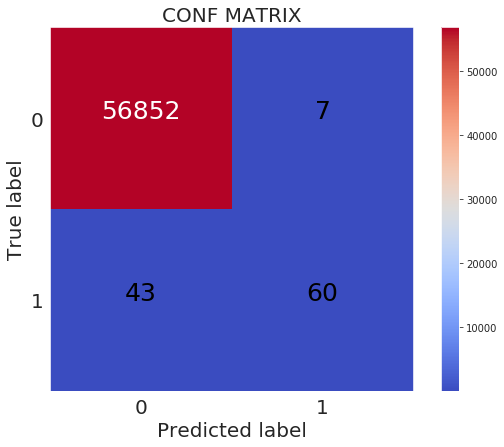

In [29]:
#print the precision, recall , accuracy and confusion matrix

print('Precision Score: {}\n'.format(precision_score(y_test,pred_3)))
print('Recall Score: {}\n'.format(recall_score(y_test,pred_3)))
print('Accuracy Score: {}\n'.format(accuracy_score(y_test,pred_3)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize = (8,6))
plot_confusion_matrix(conf_matt
                      , classes=class_names
                      , title='CONF MATRIX')
plt.show()

**Looks like grid search did not help much** **:-----((((**


## Logistic Regression

Lets try logistic regression and see if we can get a better result. 

Precision Score: 0.9264705882352942

Recall Score: 0.6116504854368932

Accuracy Score: 0.9992099996488887



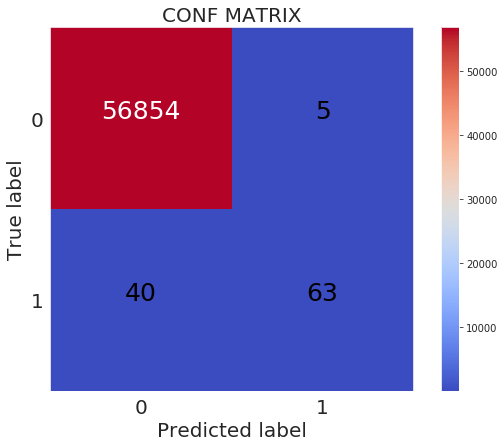

In [30]:
#lets use logistic regression model

from sklearn.linear_model import LogisticRegression

#after multiple runs below parameters seem to give the best restult. 

log_reg = LogisticRegression(C = 0.01, penalty= 'l2')

log_reg.fit(X_train,y_train)

pred_log_reg = log_reg.predict(X_test)

conf_mat = confusion_matrix(y_test,pred_log_reg)


#print the precision, recall , accuracy and confusion matrix

print('Precision Score: {}\n'.format(precision_score(y_test,pred_log_reg)))
print('Recall Score: {}\n'.format(recall_score(y_test,pred_log_reg)))
print('Accuracy Score: {}\n'.format(accuracy_score(y_test,pred_log_reg)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize = (8,6))
plot_confusion_matrix(conf_mat
                      , classes=class_names
                      , title='CONF MATRIX')
plt.show()

Now recall is at 61%.

## XgBoost

In [31]:
#making the imports
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

Precision Score: 0.9247311827956989

Recall Score: 0.8349514563106796

Accuracy Score: 0.9995786664794073



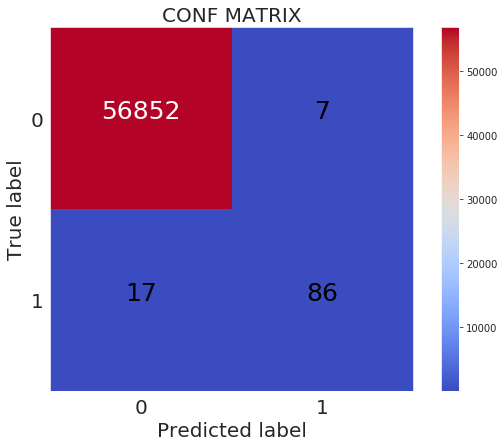

In [32]:
#try xgboost with default parameters

xgb_model = XGBClassifier()

xgb_model.fit(X_train,y_train)

xgb_pred = xgb_model.predict(X_test)

conf_mat = confusion_matrix(y_test,xgb_pred)


#print the precision, recall , accuracy and confusion matrix

print('Precision Score: {}\n'.format(precision_score(y_test,xgb_pred)))
print('Recall Score: {}\n'.format(recall_score(y_test,xgb_pred)))
print('Accuracy Score: {}\n'.format(accuracy_score(y_test,xgb_pred)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize = (8,6))
plot_confusion_matrix(conf_mat
                      , classes=class_names
                      , title='CONF MATRIX')
plt.show()


**So we have improved our recall using Xgboost. :-)** 

Now we have recall at 83%.

In [33]:
# hyperparameter tuning with XGBoost (will take some time to run)

# creating a KFold object 
folds = KFold(n_splits= 3, shuffle= True, random_state= 101)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True, 
                       n_jobs= -1)      


In [34]:
model_cv.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 14.4min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.6],
                         'subsample': [0.3, 0.6, 

In [35]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv.best_score_,'using',model_cv.best_params_)

We can get accuracy of 0.9846581253874364 using {'learning_rate': 0.1, 'subsample': 0.6}


In [36]:
#lets use model with these parameters
xgb_model_2 = XGBClassifier(max_depth=2, n_estimators=200, learning_rate= 0.1, subsample= 0.6)

Precision Score: 0.9239130434782609

Recall Score: 0.8252427184466019

Accuracy Score: 0.9995611109160493



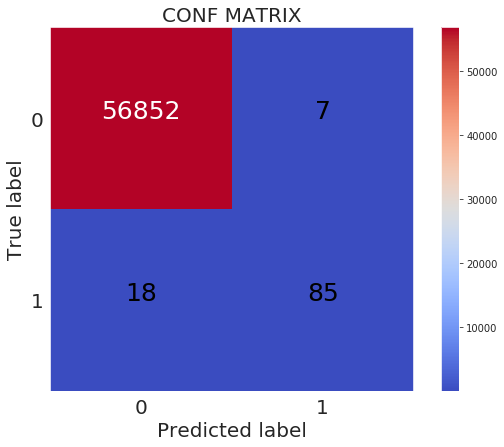

In [37]:
#lets make predictions using this model
xgb_model_2.fit(X_train,y_train)

xgb_pred = xgb_model_2.predict(X_test)

conf_mat = confusion_matrix(y_test,xgb_pred)


#print the precision, recall , accuracy and confusion matrix

print('Precision Score: {}\n'.format(precision_score(y_test,xgb_pred)))
print('Recall Score: {}\n'.format(recall_score(y_test,xgb_pred)))
print('Accuracy Score: {}\n'.format(accuracy_score(y_test,xgb_pred)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize = (8,6))
plot_confusion_matrix(conf_mat
                      , classes=class_names
                      , title='CONF MATRIX')
plt.show()

**Seems like grid search did not make much of a difference from previous value.**


## Neural Nets

In [38]:
#making the imports

import tensorflow as tf
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [39]:
# checking the shapes of test and train
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(227845, 30)
(227845,)
(56962, 30)
(56962,)


In [40]:
#define the model
model = Sequential()
model.add(Dense(64, input_dim=30, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(2, activation='softmax'))  # With 2 outputs


In [41]:
#compile using adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
#convert y_train and y_test to categorical values with 2 classes
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [43]:
#lets do first 10 epochs with a batch size of 2048
epoch = 10
batch_size = 2048
model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size)

Epoch 1/10
227845/227845 [==============================] - 5s 21us/step - loss: 1.1178 - acc: 0.8451
Epoch 2/10
227845/227845 [==============================] - 1s 3us/step - loss: 0.1723 - acc: 0.9730
Epoch 3/10
227845/227845 [==============================] - 1s 3us/step - loss: 0.0927 - acc: 0.9896
Epoch 4/10
227845/227845 [==============================] - 1s 3us/step - loss: 0.0690 - acc: 0.9943
Epoch 5/10
227845/227845 [==============================] - 1s 3us/step - loss: 0.0560 - acc: 0.9964
Epoch 6/10
227845/227845 [==============================] - 1s 3us/step - loss: 0.0485 - acc: 0.9971
Epoch 7/10
227845/227845 [==============================] - 1s 3us/step - loss: 0.0438 - acc: 0.9976
Epoch 8/10
227845/227845 [==============================] - 1s 3us/step - loss: 0.0419 - acc: 0.9977
Epoch 9/10
227845/227845 [==============================] - 1s 3us/step - loss: 0.0379 - acc: 0.9979
Epoch 10/10
227845/227845 [==============================] - 1s 3us/step - loss: 0.0363 - 

In [44]:
#evaluate the model
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

56962/56962 [==============================] - 3s 49us/step
Test score: 0.028490657973878102
Test accuracy: 0.9981917769741231


Model accuracy is quite high. :-)

In [45]:
#training for more epochs to get better results (lets say 50 epochs)
history = model.fit(X_train, y_train, batch_size = 2048, epochs = 50, 
         validation_data = (X_test, y_test), verbose = 2)

Train on 227845 samples, validate on 56962 samples
Epoch 1/50
 - 1s - loss: 0.0350 - acc: 0.9981 - val_loss: 0.0286 - val_acc: 0.9982
Epoch 2/50
 - 1s - loss: 0.0339 - acc: 0.9981 - val_loss: 0.0287 - val_acc: 0.9982
Epoch 3/50
 - 1s - loss: 0.0332 - acc: 0.9981 - val_loss: 0.0288 - val_acc: 0.9982
Epoch 4/50
 - 1s - loss: 0.0323 - acc: 0.9982 - val_loss: 0.0288 - val_acc: 0.9982
Epoch 5/50
 - 1s - loss: 0.0321 - acc: 0.9982 - val_loss: 0.0288 - val_acc: 0.9982
Epoch 6/50
 - 1s - loss: 0.0310 - acc: 0.9982 - val_loss: 0.0289 - val_acc: 0.9982
Epoch 7/50
 - 1s - loss: 0.0304 - acc: 0.9982 - val_loss: 0.0289 - val_acc: 0.9982
Epoch 8/50
 - 1s - loss: 0.0295 - acc: 0.9983 - val_loss: 0.0289 - val_acc: 0.9982
Epoch 9/50
 - 1s - loss: 0.0295 - acc: 0.9983 - val_loss: 0.0289 - val_acc: 0.9982
Epoch 10/50
 - 1s - loss: 0.0298 - acc: 0.9983 - val_loss: 0.0289 - val_acc: 0.9982
Epoch 11/50
 - 1s - loss: 0.0286 - acc: 0.9983 - val_loss: 0.0288 - val_acc: 0.9982
Epoch 12/50
 - 1s - loss: 0.0279 -

In [46]:
# Check the history keys
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [47]:
#convert to a data frame
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

#make the epoch start from 1
def add_one(x):
    return x+1

hist['epoch'] = hist['epoch'].apply(add_one)

hist

,val_loss,val_acc,loss,acc,epoch
0,0.028608,0.998192,0.035046,0.998073,1
1,0.028687,0.998192,0.033882,0.998095,2
2,0.028769,0.998192,0.033172,0.998113,3
3,0.028807,0.998192,0.032303,0.998205,4
4,0.028833,0.998192,0.032063,0.998201,5
5,0.028869,0.998192,0.030980,0.998214,6
6,0.028887,0.998192,0.030417,0.998240,7
7,0.028892,0.998192,0.029540,0.998253,8
8,0.028882,0.998192,0.029481,0.998253,9
9,0.028873,0.998192,0.029752,0.998266,10


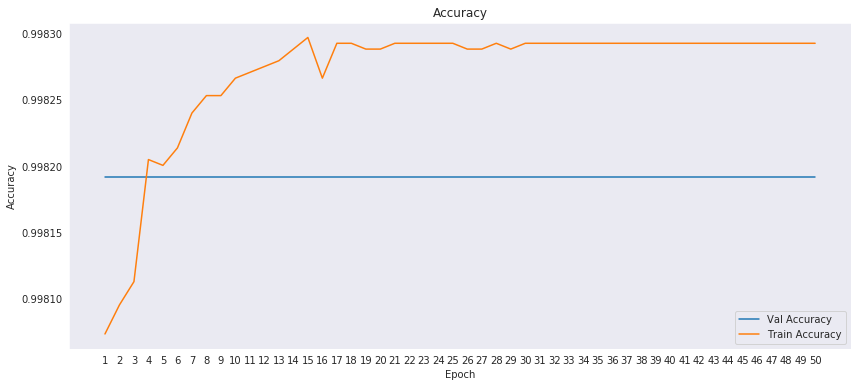

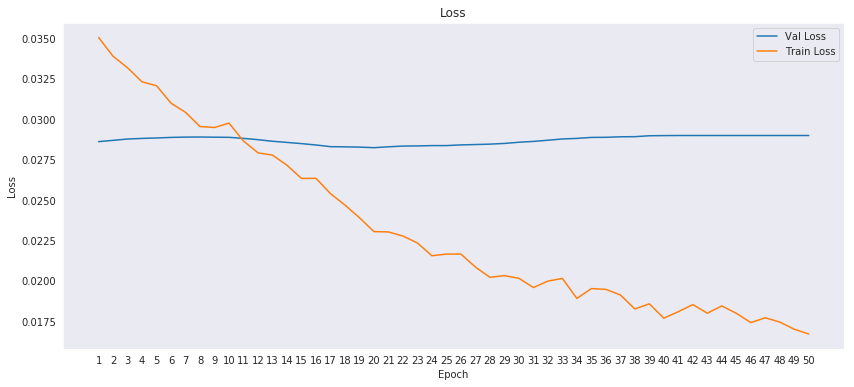

In [48]:
#plotting the results to see difference between train and validation accuracy/loss

plt.figure(figsize = (14,6))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist['epoch'],hist['val_acc'], label = 'Val Accuracy')
plt.plot(hist['epoch'],hist['acc'], label = 'Train Accuracy')
plt.xticks(range(1,51))
plt.legend(loc = 'lower right')
plt.title('Accuracy')
plt.show()

plt.figure(figsize = (14,6))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist['epoch'],hist['val_loss'], label = 'Val Loss')
plt.plot(hist['epoch'],hist['loss'], label = 'Train Loss')
plt.xticks(range(1,51))
plt.legend()
plt.title('Loss')
plt.show()

The validation set loss starts to show some improvement after epoch 40.

Precision Score: 0.0

Recall Score: 0.0

Accuracy Score: 0.9981917769741231



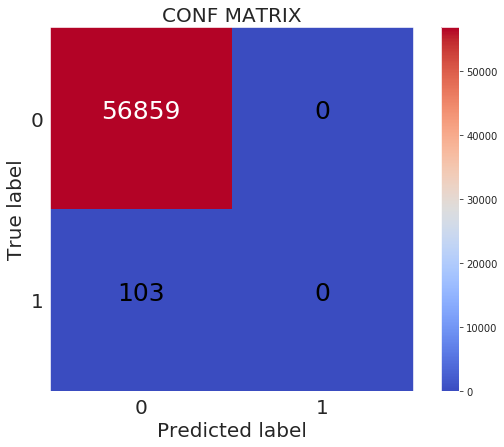

In [49]:
#lets predict using this trained model and get the confusion matrix

nn_pred = model.predict(X_test)

pred_classes = np.argmax(nn_pred,axis = 1)

y_true = np.argmax(y_test,axis = 1) 

conf_mat = confusion_matrix(y_true,pred_classes)


#print the precision, recall , accuracy and confusion matrix

print('Precision Score: {}\n'.format(precision_score(y_true,pred_classes)))
print('Recall Score: {}\n'.format(recall_score(y_true,pred_classes)))
print('Accuracy Score: {}\n'.format(accuracy_score(y_true,pred_classes)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize = (8,6))
plot_confusion_matrix(conf_mat
                      , classes=class_names
                      , title='CONF MATRIX')
plt.show()

The accuracy is good but very bad recall and precision. Looks like neural networks is not a good approach for this problem (highly skewed). Although further tuning and playing with layers can give better results. 

In **summary** we can say that:

* We did not observe a clear distinction between normal and fraudulent transactions during data analysis.

* All the features of this dataset were PCA transformed other than the time and amount, which don't indicated a proper correlation with the target variable.

* If we had the orignal data feature engineering could have given better results. 

* Mostly models with default parameters (Random Forest/ Xgboost) resulted in better performance than doing the GridSearch for hyper parameter tuning.

* So I would suggest to stick with either Xgboost or Random Forest for this problem.